# IMDB Score Final Project-Data Preperation

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."
Jessica Davis

# Business Understanding

## Background
The IMDB movie score uses the following weighted average formula to determine it's movie scores: 
 (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
Where:
   - R = average for the movie (mean) = (Rating)
   - v = number of votes for the movie = (votes)
   - m = minimum votes required to be listed in the Top 250 (currently 25000)
   - C = the mean vote across the whole report (currently 7.0)
   
IMDB also puts more weights on different rater's votes, depending on how often they rate and how much their rating effects other IMDB users.

IMDB Scores and Movie Success 
* Customers heavily weigh movie scores from sources such as IMDB to determine whether they should watch a movie.
* Google has determined that movies with high search rates have higher box office scores. It is likely these searches are for review scores such as IMDB.
* Movie's production, advertising, and distribution costs are increasing over time, therefore it is crucial to predict a movie's sucess in order to predict return on investment.
* As the international market comes into play, movie trends need to change with different culture's preferences.

Past research has shown that the following variables have the strongest correlation with IMDB score:
* Duration
* Budget (not strong but important)
* Director facebook popularity
* Facebook popuarity of the top 3 actors/actresses
* Title year

This data is from 2016, therefore it may not reflect variables that are becoming more important, such as international appeal in developing Countries like China

## Objectives

The project goal is to determine which variables (that can be controlled before movie release) determine IMBD score. A model will be developed to assist various stakeholders in the movie industry in determining whether there will be a return on production, marketing, distribution, and screening budgets.This model use practical movie variables to predict future IMDB score.

## Success Criteria

* Determine variables that correlate to a higher IMDB score
* Describe the relationship between important movie variables and IMDB scores
* Create a model that accurately predict movie IMDB score
* Explain how stakeholders can use this model to determine whether movies are likely to yield a return on investment

## Project Plan
* Data Understanding
* Data Preparation
* Data Transformation
* Regression Analysis
* Classification Analysis
* Clustering Analysis
* Model Selection and Implementation

## Data Understanding

### Introduce the Data Set

In [403]:
#Import necessary packages
import pandas as pd
import numpy as np
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

In [404]:
#remove warnings to keep dataset clean
import warnings
warnings.filterwarnings('ignore')

In [405]:
#Set Display Format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

#### A Preview of the Data Set is Displayed Below

In [406]:
# Import Data
df = pd.read_csv('data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [407]:
#Determine Data Shape
df.shape

(5043, 28)

There are 5 rows and 28 columns in this data set.

#### Explaination of Data Columns

In [408]:
#The data columns are explained below
dt = pd.read_excel('data/imdb_description.xlsx')
dt

,Variable Name,Description
0,movie_title,Title of the Movie
1,duration,Duration in minutes
2,director_name,Name of the Director of the Movie
3,director_facebook_likes,Number of likes of the Director on his Facebook Page
4,actor_1_name,Primary actor starring in the movie
5,actor_1_facebook_likes,Number of likes of the Actor_1 on his/her Facebook Page
6,actor_2_name,Other actor starring in the movie
7,actor_2_facebook_likes,Number of likes of the Actor_2 on his/her Facebook Page
8,actor_3_name,Other actor starring in the movie
9,actor_3_facebook_likes,Number of likes of the Actor_3 on his/her Facebook Page


### Describe the data

#### Basic Statistics

In [409]:
#basic statistics that describe the data set are listed below
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Basic Statistics for IMDB scores included in this data set are listed below:

In [410]:
#imdb score statistics
df['imdb_score'].describe()

count    5043.000000
mean     6.442138   
std      1.125116   
min      1.600000   
25%      5.800000   
50%      6.600000   
75%      7.200000   
max      9.500000   
Name: imdb_score, dtype: float64

IMDB scores range from 0-10, however the highest score in this data set is 9.5. The lowest score in this data set is 1.6. The mean score is 6.4. The disribution of IMDB scores is visualized in the histogram below.

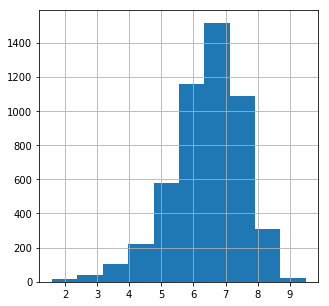

In [411]:
#Histogram of IMDB Scores
df['imdb_score'].hist(figsize=(5,5))

#### Post and Pre-Movie Variables

This data includes many variables that occur after movie premiere such as:
* Number of Critics for Reviews
* Movie facebook likes
* Gross
* Number of voted users
* Number of users for review
* Movie_imbd_link

Some of this data may be helpful in describing variables that relate to IMDB score calculation.

For example, IMDB movie score caluclation uses variables that are included in this dataset:
* Number of votes from users
* Number of user reviews
* Number of reviews from critics

The relationship between Number of votes from users and IMDB score is below. The relationship is positive, which makes sense because this factors into IMDB score formula.

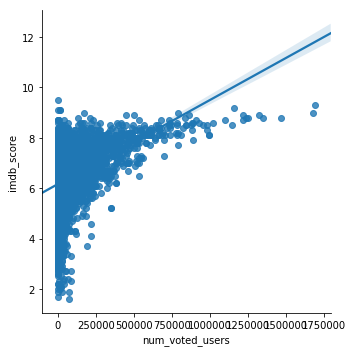

In [412]:
#Correlation between Number of Votes from Users and IMDB Score
sns.lmplot("num_voted_users", "imdb_score", df)

The number of User Reviews and IMDB score is also positively correlated.

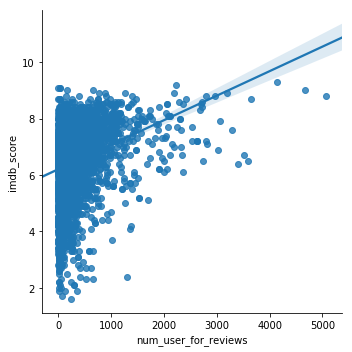

In [413]:
#Correlation between User Reviews and IMDB Score
sns.lmplot("num_user_for_reviews", "imdb_score", df)

There is also a positive relationship between IMDB score and number of critic reviews. The higher the IMDB score, the more critics that are compelled to review the movie.

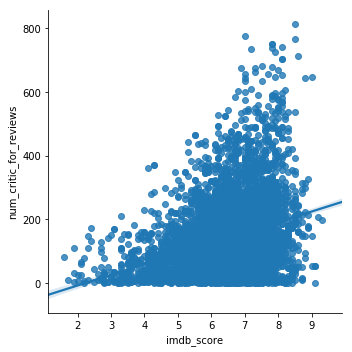

In [414]:
#Correlation between Number of Critic Reviews and IMDB Score
sns.lmplot("imdb_score", "num_critic_for_reviews", df)

There is a positive correlation between the number of critic reviews and gross earnings.

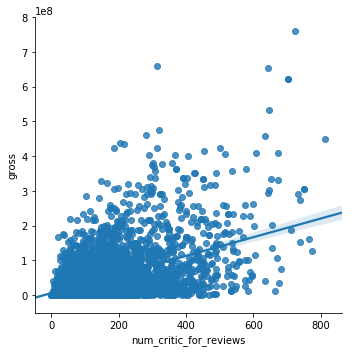

In [415]:
# Correlation between Number of Critic Reviews and Gross
sns.lmplot("num_critic_for_reviews", "gross", df)

The relationship between IMDB score and Gross profit is positive as well, but not as strong. It is more likely that the relationship between IMDB and Gross profits has mediating variables such as number of user reviews and number of critic reviews.

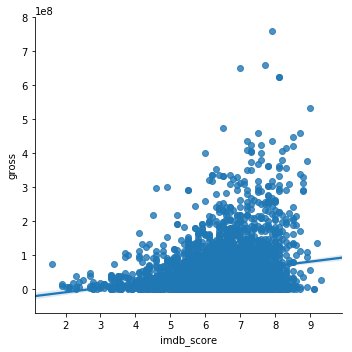

In [416]:
#Correlation between IMDB score and Gross Earnings
sns.lmplot("imdb_score", "gross", df)

The following variables can be determined prior to release and could be helpful in predicting IMDB scores:
* Duration
* Director Facebook Likes
* Actor 1,2, and 3 Facebook Likes
* Cast Total Facebook Likes
* Face Number in Poster
* Budget
* Title Year
* Aspect Ratio
* Genres
* Keywords
* Country
* Language
* Content Rating
* Color

The relationship between these variables and IMDB score will be explored throughout Part 1 of this Project

### Explore the Data

#### Data Categories

The types of data in this data set can be split into two categories: objects (categorical) and float/int (Numerical)

In [417]:
#describe variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Categorical Columns (12):
* color
* director_name
* actor_1_name
* actor_2_name
* actor_3_name
* genres
* movie_title
* plot_keywords
* movie_imdb_link
* language, country
* content_rating

Numerical Columns (16): 
* num_critic_for_reviews
* duration
* director_facebook_likes
* actor_3_facebook_likes
* actor_1_facebook_likes
* gross
* num_voted_users
* cast_total_facebook_likes
* actor_1_facebook_likes
* facenumber_in_poster
* num_user_for_reviews
* budget
* title_year
* imdb_score
* aspect_ratio
* movie_facebook_likes

#### Explore Properties of Key Variables

The following variables are important correlations with IMDB score, and therefore a movie's success:
* Duration
* Director Facebook Likes
* Budget
* Actor 1 Facebook Likes
* Actor 2 Facebook Likes
* Actor 3 Facebook Likes
* Content Rating
* Genre
* Total Cast Facebook Likes

These variables will be explored after that data has been cleaned and tranformed.

### Evaluate Data Quality

#### Check for Missing Data:

In [418]:
#number of missing data values by column
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

* There are multiple instances of missing data that will need to be clearned during the data preparation stage

#### Check Categorical Data for Inconsistent Values:

Content Rating

In [419]:
#values in the content rating
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG           701 
Not Rated    116 
G            112 
Unrated      62  
Approved     55  
TV-14        30  
TV-MA        20  
X            13  
TV-PG        13  
TV-G         10  
Passed       9   
NC-17        7   
GP           6   
M            5   
TV-Y7        1   
TV-Y         1   
Name: content_rating, dtype: int64

Content Rating Data Issues:
* GP is a dated version of PG, so it can be replaced with PG
* M is a dated version of PG, so it can be replaced with PG
* TV-14 is equivalent to PG-13, so it can be replaced with PG-13
* TV-G is equivalent to G, so it can replaced with G
* TV-Y and TV-7 are equivalents to G, so they can replaced with G
* TV-PG is equivalent to PG, so it can be replaced wtih PG
* TV-MA is equivalent to R, so it can replaced with R
* X is a dated version of NC-17, so it can be replaced by NC-17

#### Address Numerical Outliers

Almost every numerical variables in this data set has a significant outlier
* These outliers may effect correlation results
* However, these outliers were included in this analysis because they have practical implications for stakeholders

Examples:
* How strong is the draw extremely popular actors and directors? (number of actor 1 and director facebook likes)
* Is there such a thing as a movie that is too long, or is the novelty of an extremely long movie attractive?(duratopm)
* Do extremely large budgets lead to a significant amount of success compared to moderately large budgets? (budget)

## Data Preparation

### Select Important Data Variables

Variables that occur post-movie release are not able to help movie companies predict outcome, which is the core business problem. Although these variables may affect IMDB scores, they will not be of use to movie stakeholders for this problem. Therefore, they will be removed.

* num_user_for_reviews
* num_critic_for_reviews
* num_voted_users
* movie_imdb_link
* gross
* movie_facebook_likes

The following columns can also be removed, any actor or director popularity can be tracked with the number of facebook likes:

* director_name
* actor_1_name
* actor_2_name
* actor_3_name

In [420]:
#remove irrelevant columns
df = df.drop(['num_user_for_reviews','movie_facebook_likes','num_critic_for_reviews', 'num_voted_users', 'movie_imdb_link', 'gross', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)
df.head()

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,movie_title,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,Color,178.0,0.0,855.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,4834,0.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78
1,Color,169.0,563.0,1000.0,40000.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35
2,Color,148.0,0.0,161.0,11000.0,Action|Adventure|Thriller,Spectre,11700,1.0,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35
3,Color,164.0,22000.0,23000.0,27000.0,Action|Thriller,The Dark Knight Rises,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35
4,NaN,NaN,131.0,NaN,131.0,Documentary,Star Wars: Episode VII - The Force Awakens,143,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN


We can also drop variables that are unlikely to relate to IMDB prediction

In [421]:
df = df.drop(['aspect_ratio', 'color', 'title_year', 'facenumber_in_poster', 'plot_keywords', 'plot_keywords', 'language', 'country'], axis=1)

### Clean Data

#### Drop Missing Values

* Missing Numerical Values can be addressed by dropping the rows that have missing values
* It is unlikely to be helpful to replace them in a model that predicts IMDB score

In [422]:
#drop missing values
df = df.dropna()

In [423]:
#Confirm all variables have the same number of data points
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 0 to 5042
Data columns (total 11 columns):
duration                     4333 non-null float64
director_facebook_likes      4333 non-null float64
actor_3_facebook_likes       4333 non-null float64
actor_1_facebook_likes       4333 non-null float64
genres                       4333 non-null object
movie_title                  4333 non-null object
cast_total_facebook_likes    4333 non-null int64
content_rating               4333 non-null object
budget                       4333 non-null float64
actor_2_facebook_likes       4333 non-null float64
imdb_score                   4333 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 406.2+ KB


* Now all columns have 4333 data points with no missing values

#### Correct Data Quality Issues

* As mentioned above, some content rating values are outdated version of current content rating categories
* In order to streamline results these older content ratings can be converted to updated content rating categories
* Some content rating categories are in TV formats, which can be converted to movie equivalents

In [424]:
#Replace outdated and tv content ratings
df = df.replace({'content_rating': 'GP'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'M'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'TV-14'}, {'content_rating': 'PG-13'})
df = df.replace({'content_rating': 'TV-G'}, {'content_rating': 'G'})
df = df.replace({'content_rating': 'TV-PG'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'TV-MA'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'X'}, {'content_rating': 'NC-17'})
df = df.replace({'content_rating': 'TV-Y'}, {'content_rating': 'G'})
df = df.replace({'content_rating': 'TV-Y7'}, {'content_rating': 'G'})

## Data Transformation

#### Categorial Values can be tranformed into dummy variables so that they can be included in analysis

In [425]:
df1 = df['content_rating'].str.get_dummies()
df = df.join(df1)

Genres can be separated into separate columns as dummy variables

In [426]:
#create categories from genre category
df['genres'] = df['genres'].str.replace('|', ',')
df['genres'] = df['genres'].str.split(',')
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df1 = pd.DataFrame(mlb.fit_transform(df['genres']),columns=mlb.classes_, index=df1.index)
df = df.join(df1)

In [427]:
#preview new columns
df.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,movie_title,cast_total_facebook_likes,content_rating,budget,actor_2_facebook_likes,imdb_score,Approved,G,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,0.0,855.0,1000.0,"[Action, Adventure, Fantasy, Sci-Fi]",Avatar,4834,PG-13,237000000.0,936.0,7.9,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,"[Action, Adventure, Fantasy]",Pirates of the Caribbean: At World's End,48350,PG-13,300000000.0,5000.0,7.1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Some of the genre categories can be removed to reduce the number of columns

In [428]:
#remove unnecessary genre columns
df = df.drop(['News'], axis=1)
df = df.drop(['Sport'], axis=1)
df = df.drop(['Western'], axis=1)
df = df.drop(['Film-Noir'], axis=1)
df = df.drop(['Musical'], axis=1)
df = df.drop(['Music'], axis=1)
df = df.drop(['Mystery'], axis=1)
df = df.drop(['Crime'], axis=1)
df = df.drop(['Romance'], axis=1)
df = df.drop(['Animation'], axis=1)
df = df.drop(['Family'], axis=1)
df = df.drop(['Adventure'], axis=1)
df = df.drop(['Action'], axis=1)
df = df.drop(['Fantasy'], axis=1)
df = df.drop(['Sci-Fi'], axis=1)

Similar genre columns can be combined

In [429]:
#combine genre columns
df['Thrill_Horror'] = df1['Thriller'] + df['Horror']
df['Bio_Hist_Doc_War'] = df1['Biography'] + df['History'] + df['Documentary'] + df['War']

The columns that were combined above can now be removed

In [430]:
#remove redundant columns
df = df.drop(['Thriller'], axis=1)
df = df.drop(['Biography'], axis=1)
df = df.drop(['History'], axis=1)
df = df.drop(['Documentary'], axis=1)
df = df.drop(['War'], axis=1)
df = df.drop(['Horror'], axis=1)

In [431]:
df.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,movie_title,cast_total_facebook_likes,content_rating,budget,actor_2_facebook_likes,imdb_score,Approved,G,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War
0,178.0,0.0,855.0,1000.0,"[Action, Adventure, Fantasy, Sci-Fi]",Avatar,4834,PG-13,237000000.0,936.0,7.9,0,0,0,0,0,1,0,0,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,"[Action, Adventure, Fantasy]",Pirates of the Caribbean: At World's End,48350,PG-13,300000000.0,5000.0,7.1,0,0,0,0,0,1,0,0,0,0,0,0,0


Reduce the number of Content Rating columns

In [432]:
#content rating columns can also be reduced
df = df.drop(['Passed'], axis=1)
df = df.drop(['Unrated'], axis=1)
df = df.drop(['Not Rated'], axis=1)
df = df.drop(['Approved'], axis=1)
df = df.drop(['NC-17'], axis=1)

In [433]:
df.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,movie_title,cast_total_facebook_likes,content_rating,budget,actor_2_facebook_likes,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War
0,178.0,0.0,855.0,1000.0,"[Action, Adventure, Fantasy, Sci-Fi]",Avatar,4834,PG-13,237000000.0,936.0,7.9,0,0,1,0,0,0,0,0
1,169.0,563.0,1000.0,40000.0,"[Action, Adventure, Fantasy]",Pirates of the Caribbean: At World's End,48350,PG-13,300000000.0,5000.0,7.1,0,0,1,0,0,0,0,0


Now all of our non-numerical variables have been changed into dummy variables

#### Next we can consolidate some of the remaining columns into categories

Actor likes columns can be combined into a total actor popularity column

In [434]:
#crate actor popularity column
df['Total_Actor_Likes'] = df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_2_facebook_likes']

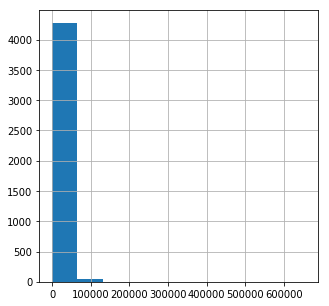

In [435]:
#Histogram of Total Actor Likes
df['Total_Actor_Likes'].hist(figsize=(5,5))

In [436]:
df['Total_Actor_Likes'].describe()

count    4333.000000  
mean     10770.924071 
std      19912.259143 
min      0.000000     
25%      1434.000000  
50%      2659.000000  
75%      14476.000000 
max      656000.000000
Name: Total_Actor_Likes, dtype: float64

In [437]:
df['actor_popularity'] = 6
df['actor_popularity'][df['Total_Actor_Likes'] > 50000] = 6
df['actor_popularity'][(df['Total_Actor_Likes'] >20000 ) & (df['Total_Actor_Likes'] < 50000)] = 5
df['actor_popularity'][(df['Total_Actor_Likes'] >4000 ) & (df['Total_Actor_Likes'] < 20000)] = 4
df['actor_popularity'][(df['Total_Actor_Likes'] >1500 ) & (df['Total_Actor_Likes'] < 4000)] = 3
df['actor_popularity'][(df['Total_Actor_Likes'] >500 ) & (df['Total_Actor_Likes'] < 1500)] = 2
df['actor_popularity'][df['Total_Actor_Likes'] < 500] = 1

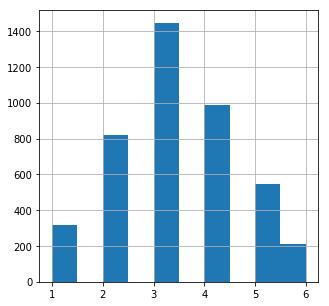

In [438]:
#Histogram of Total Actor Likes
df['actor_popularity'].hist(figsize=(5,5))

Actor Popularity
* 6=extrmely popular (over 50000)
* 5=very popular (20000-50000)
* 4=popular (4000-20000)
* 3=somewhat popular (1500-4000)
* 2=unpopular (500-1500)
* 1=unknown (less than 500)

After reviewing the data set, total cast facebook likes can be removed
* It includes actor 1-3 facebook likes (popularity)
* It is not as practical for stakeholders to measure, there could be a very large cast and tracking all their facebook likes could be difficult.

In [439]:
#create total cast popularity column
df=df.drop(['cast_total_facebook_likes'], axis=1)

Director popularity columns can also be created

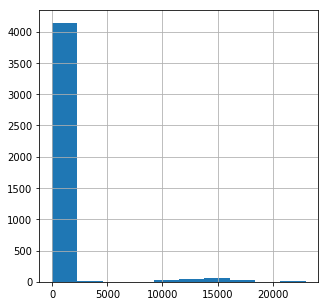

In [440]:
#Histogram of Total Actor Likes
df['director_facebook_likes'].hist(figsize=(5,5))

In [441]:
df['director_facebook_likes'].describe()

count    4333.000000 
mean     757.857604  
std      2958.697086 
min      0.000000    
25%      9.000000    
50%      56.000000   
75%      218.000000  
max      23000.000000
Name: director_facebook_likes, dtype: float64

In [442]:
##### director popularity categories
df['director_popularity'] = 4
df['director_popularity'][df['director_facebook_likes'] > 500] = 4
df['director_popularity'][(df['director_facebook_likes'] >100 ) & (df['director_facebook_likes'] < 500)] = 3
df['director_popularity'][(df['director_facebook_likes'] >1 ) & (df['director_facebook_likes'] < 100)] = 2
df['director_popularity'][df['director_facebook_likes'] < 1] = 1

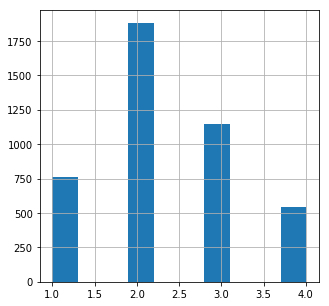

In [443]:
df['director_popularity'].hist(figsize=(5,5))

Director Popularity
* 4=very popular (over 500 likes)
* 3=popular (100-500)
* 2=unpopular (1-100)
* 1=unknown (0)

These popularity categories will help simplify stakeholder decisions when applying models
* Stakeholders will unlikely want to track exact facebook likes because this is not a static number
* Applying actor popularity categories is simplier

All other Redundant columns can now be removed

In [444]:
#remove redundate columns
df = df.drop(['content_rating'], axis=1)
df = df.drop(['genres'], axis=1)
df = df.drop(['actor_1_facebook_likes'], axis=1)
df = df.drop(['actor_2_facebook_likes'], axis=1)
df = df.drop(['actor_3_facebook_likes'], axis=1)
df = df.drop(['Total_Actor_Likes'], axis=1)
df = df.drop(['director_facebook_likes'], axis=1)

In [445]:
#movie title can calso be removed
df = df.drop(['movie_title'], axis=1)

In [446]:
df.head(2)

,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
0,178.0,237000000.0,7.9,0,0,1,0,0,0,0,0,3,1
1,169.0,300000000.0,7.1,0,0,1,0,0,0,0,0,6,4


#### Review the transformed dataset

In [447]:
#how many columns are in df1?
df.shape

(4333, 13)

* There are 13 columns in the data frame

Now our first dataset is complete
* Regression Models used in the next secion can help us choose which of these 13 variables are important

### Correlation Analysis

Correlation analysis can be used to determine which variables correlate directly with IMDB score

In [448]:
#conduct IMDB correlation analysis
corr= pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
duration,0.366887
Drama,0.309294
Bio_Hist_Doc_War,0.203267
director_popularity,0.121185
R,0.093888
actor_popularity,0.087550
budget,0.030981
G,0.011201
PG,-0.048287
PG-13,-0.109254


In [449]:
#correlation between all variables
df.corr()

,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
duration,1.000000,0.072644,0.366887,-0.076612,-0.078242,0.080314,0.009666,-0.293881,0.278663,-0.082473,0.287481,0.170829,0.117536
budget,0.072644,1.000000,0.030981,0.001253,0.013148,0.042446,-0.032375,-0.006681,-0.021792,-0.003024,-0.006838,0.036546,0.038925
imdb_score,0.366887,0.030981,1.000000,0.011201,-0.048287,-0.109254,0.093888,-0.181628,0.309294,-0.146785,0.203267,0.087550,0.121185
G,-0.076612,0.001253,0.011201,1.000000,-0.068641,-0.109931,-0.145857,0.064805,-0.061575,-0.106511,0.010401,-0.073565,-0.029453
PG,-0.078242,0.013148,-0.048287,-0.068641,1.000000,-0.292418,-0.387980,0.142634,-0.142940,-0.216303,-0.017721,0.003954,-0.031032
PG-13,0.080314,0.042446,-0.109254,-0.109931,-0.292418,1.000000,-0.621361,0.007804,-0.027675,-0.034438,-0.024485,0.141159,0.053124
R,0.009666,-0.032375,0.093888,-0.145857,-0.387980,-0.621361,1.000000,-0.110806,0.143755,0.230840,0.010921,-0.017169,-0.012173
Comedy,-0.293881,-0.006681,-0.181628,0.064805,0.142634,0.007804,-0.110806,1.000000,-0.251217,-0.368661,-0.197978,0.003784,-0.063582
Drama,0.278663,-0.021792,0.309294,-0.061575,-0.142940,-0.027675,0.143755,-0.251217,1.000000,-0.153163,0.245821,0.001287,0.049580
Thrill_Horror,-0.082473,-0.003024,-0.146785,-0.106511,-0.216303,-0.034438,0.230840,-0.368661,-0.153163,1.000000,-0.157417,-0.002232,-0.004947


#### The corelation above can be visualized in the cluster map beloow

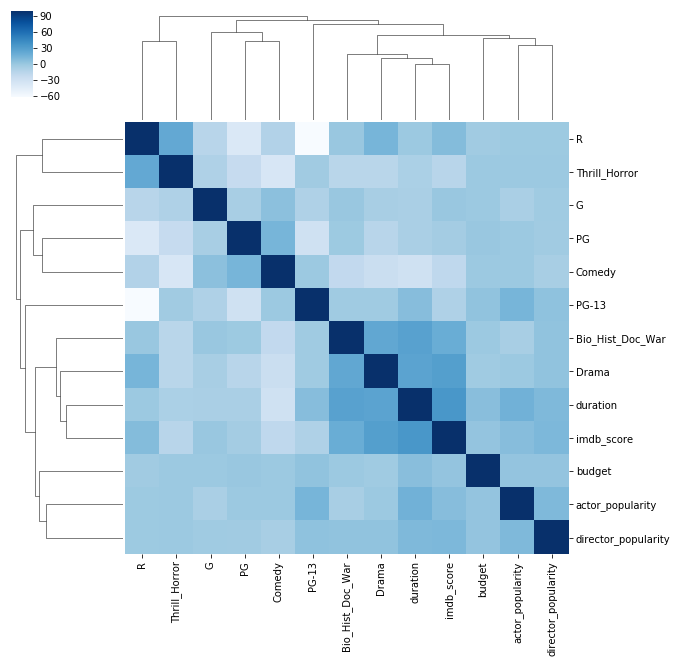

In [450]:
#visualize correlations
corr = df.corr().mul(100).astype(int)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(data=corr, fmt='d', cmap="Blues", annot_kws={"size": 16})

#### The top variables in this correlation analysis are listed below (in order of strength):
* Duration (+)
* Drama (+)
* Biography, History, Documentary, and War genres (+)
* Comedy (-)
* Thrill/Horror (-)
* Director Popularity (+)

#### Correlation Implications:

Some genres highly correlate to IMDB score categories
* People rate Dramas highly
* Biographies, History, Documentary, and War movies are rated higher
* Comedies are not rated highly
* Thriller and Horro movies are not rated highly 

Generally
* Longer movies are rated higher
* Movies directed by popular directors are rated highly

Content Rating
* R movies are rated higher
* PG-13 movies are rated lower

### Save Data as new data set

In [451]:
#preview the dataset
df.head()

,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
0,178.0,237000000.0,7.9,0,0,1,0,0,0,0,0,3,1
1,169.0,300000000.0,7.1,0,0,1,0,0,0,0,0,6,4
2,148.0,245000000.0,6.8,0,0,1,0,0,0,1,0,4,1
3,164.0,250000000.0,8.5,0,0,1,0,0,0,1,0,6,4
5,132.0,263700000.0,6.6,0,0,1,0,0,0,0,0,3,3


This data will be saved as a new data set so it can be used in further analysis

In [452]:
#save the dataset
df.to_csv('data/imdb_transformed')